In [1]:
import pprint
import json

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [3]:
!pip install git+https://github.com/tensorflow/docs
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-zjbzsqni
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-zjbzsqni
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0.dev0-py3-none-any.whl size=173744 sha256=c4b8d8901b5b7520cb5edaf2ac8a003f8c14c0c4c753164a569442f48292bc07
  Stored in directory: /tmp/pip-ephem-wheel-cache-4kbgpz2m/wheels/cc/c4/d8/5341e93b6376c5c929c49469fce21155eb69cef1a4da4ce32c
Successfully built tensorflow-docs


In [4]:
print(f'Tensorflow version: {tf.__version__}')
print(f'Keras version: {keras.__version__}')

Tensorflow version: 2.7.0
Keras version: 2.7.0


In [10]:
processed_data = pd.read_csv('insurance_processed.csv')
processed_data.head()

,age,bmi,children,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,-1.438764,-0.453320,-0.908614,0,1,0,0,0,1,16884.92400
1,-1.509965,0.509621,-0.078767,1,0,0,0,1,0,1725.55230
2,-0.797954,0.383307,1.580926,1,0,0,0,1,0,4449.46200
3,-0.441948,-1.305531,-0.908614,1,0,0,1,0,0,21984.47061
4,-0.513149,-0.292556,-0.908614,1,0,0,1,0,0,3866.85520


In [12]:
features = processed_data.drop(columns='charges')
target = processed_data['charges']

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.2)

In [14]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1070, 9), (268, 9), (1070,), (268,))

In [15]:
def build_model():
  model = keras.Sequential([
                            layers.Dense(32, activation='relu', input_shape=[x_train.shape[1]]),
                            layers.Dense(64, activation='relu'),
                            layers.Dense(1)
  ])

  optimizer = keras.optimizers.Adam(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])

  return model

In [16]:
model_relu_64 = build_model()
model_relu_64.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                320       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________


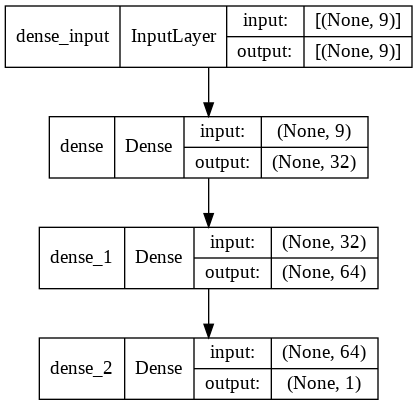

In [17]:
keras.utils.plot_model(model_relu_64, show_shapes=True)

In [18]:
EPOCHS = 1000
hist = model_relu_64.fit(x_train, y_train, epochs=EPOCHS, validation_split=0.2, verbose=True)

Epoch 1/1000
27/27 [==============================] - 2s 31ms/step - loss: 338058560.0000 - mae: 13548.9355 - mse: 338058560.0000 - val_loss: 278778688.0000 - val_mae: 12340.0957 - val_mse: 278778688.0000
Epoch 2/1000
27/27 [==============================] - 0s 6ms/step - loss: 338014400.0000 - mae: 13547.4424 - mse: 338014400.0000 - val_loss: 278725056.0000 - val_mae: 12338.1074 - val_mse: 278725056.0000
Epoch 3/1000
27/27 [==============================] - 0s 5ms/step - loss: 337926496.0000 - mae: 13544.5420 - mse: 337926496.0000 - val_loss: 278605696.0000 - val_mae: 12333.8018 - val_mse: 278605696.0000
Epoch 4/1000
27/27 [==============================] - 0s 5ms/step - loss: 337739616.0000 - mae: 13538.5586 - mse: 337739616.0000 - val_loss: 278370816.0000 - val_mae: 12325.4805 - val_mse: 278370816.0000
Epoch 5/1000
27/27 [==============================] - 0s 6ms/step - loss: 337392640.0000 - mae: 13527.4717 - mse: 337392640.0000 - val_loss: 277948480.0000 - val_mae: 12310.7148 - val

In [19]:
hist_df = pd.DataFrame(hist.history)
hist_df['epoch'] = hist.epoch
hist_df.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,16514047.0,2221.624756,16514047.0,18040140.0,2445.978760,18040140.0,995
996,16520737.0,2214.850586,16520737.0,18016842.0,2443.314453,18016842.0,996
997,16527525.0,2255.839600,16527525.0,18078182.0,2476.791992,18078182.0,997
998,16523977.0,2273.742432,16523977.0,18061682.0,2461.578857,18061682.0,998
999,16534307.0,2204.264160,16534307.0,18001270.0,2416.953125,18001270.0,999


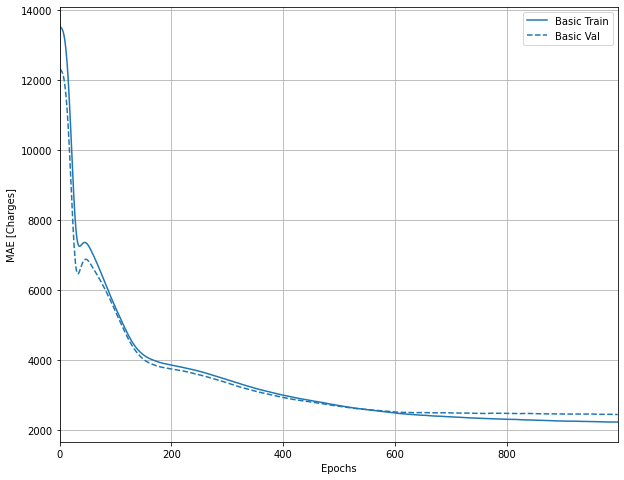

In [20]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plt.figure(figsize=(10, 8))
plotter.plot({'Basic': hist}, metric='mae')
plt.ylabel('MAE [Charges]')
plt.show();

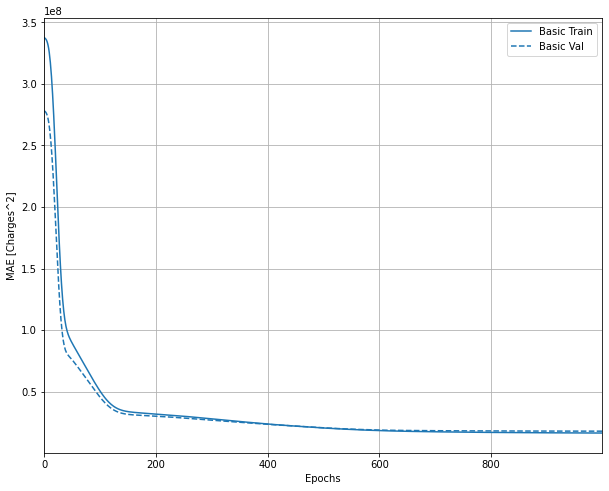

In [21]:
plt.figure(figsize=(10, 8))
plotter.plot({'Basic': hist}, metric='mse')
plt.ylabel('MAE [Charges^2]')
plt.show();

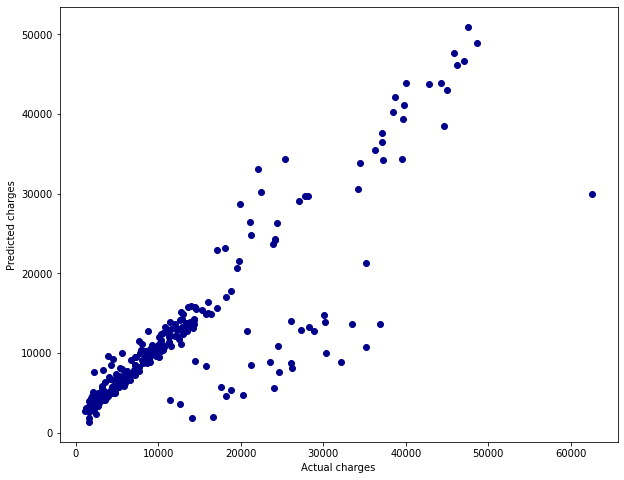

In [23]:
y_pred = model_relu_64.predict(x_test).flatten()

plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, c='darkblue')
plt.xlabel('Actual charges')
plt.ylabel('Predicted charges')
plt.show();

In [24]:
r2_score(y_test, y_pred)

0.7415803221164559

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                320       
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_10 (Dense)            (None, 64)                2112      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, loss:338056416.0000,  mae:13548.9707,  mse:338056416.0000,  val_loss:278769024.0000,  val_mae:12340.0371,  val_mse:278769024.0000,  
........................................

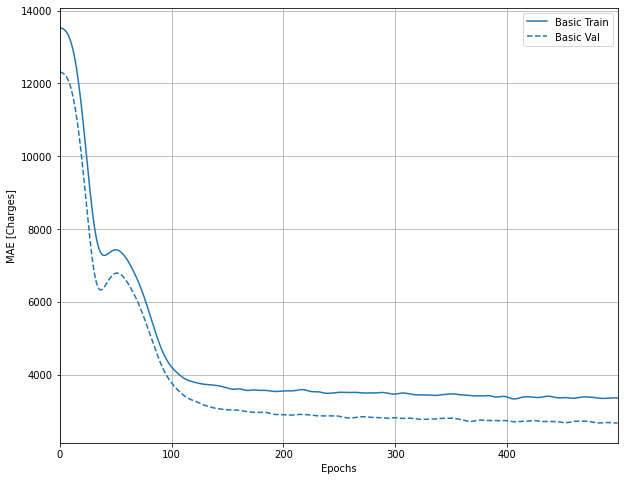

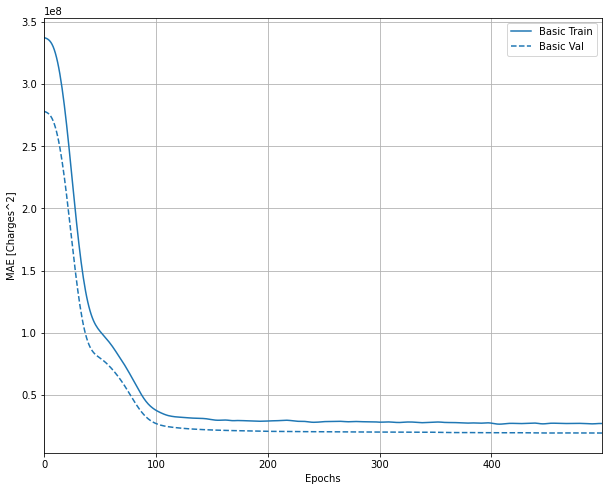

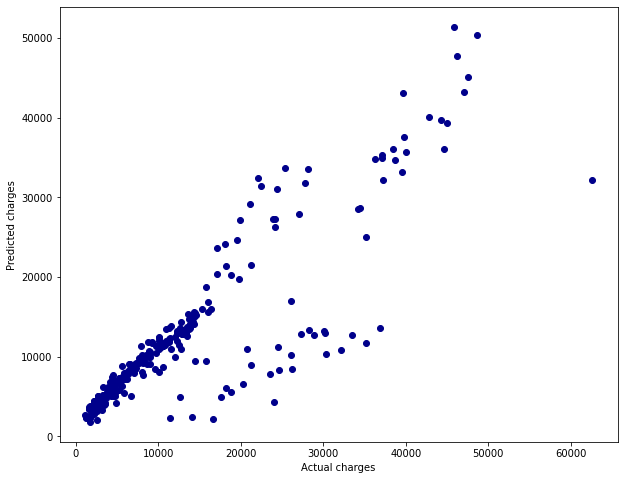

R2: 0.7443937029882166


In [27]:
def build_model():
  model = keras.Sequential([
                            layers.Dense(32, activation='elu', input_shape=[x_train.shape[1]]),
                            layers.Dropout(0.2),
                            layers.Dense(64, activation='elu'),
                            layers.Dense(1)
  ])

  optimizer = keras.optimizers.Adam(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])

  return model

model = build_model()
model.summary()

EPOCHS = 500
hist = model.fit(x_train, y_train, epochs=EPOCHS, validation_split=0.2, verbose=False,
                 callbacks=[
                            tfdocs.modeling.EpochDots() # Epochs are visualized as dots. Succint and visually appealing.
                            ]
                 )

plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plt.figure(figsize=(10, 8))
plotter.plot({'Basic': hist}, metric='mae')
plt.ylabel('MAE [Charges]')
plt.show();

plt.figure(figsize=(10, 8))
plotter.plot({'Basic': hist}, metric='mse')
plt.ylabel('MAE [Charges^2]')
plt.show();

y_pred = model.predict(x_test).flatten()

plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, c='darkblue')
plt.xlabel('Actual charges')
plt.ylabel('Predicted charges')
plt.show();

print(f'R2: {r2_score(y_test, y_pred)}')

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                320       
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_13 (Dense)            (None, 64)                2112      
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, loss:338048928.0000,  mae:13548.6650,  mse:338048928.0000,  val_loss:278762272.0000,  val_mae:12339.6982,  val_mse:278762272.0000,  
........................................

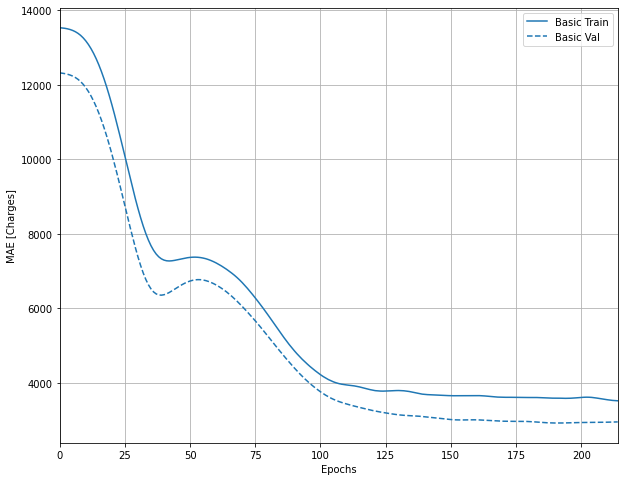

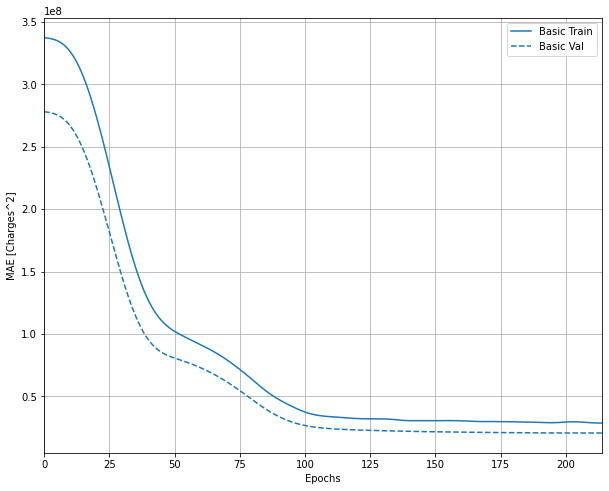

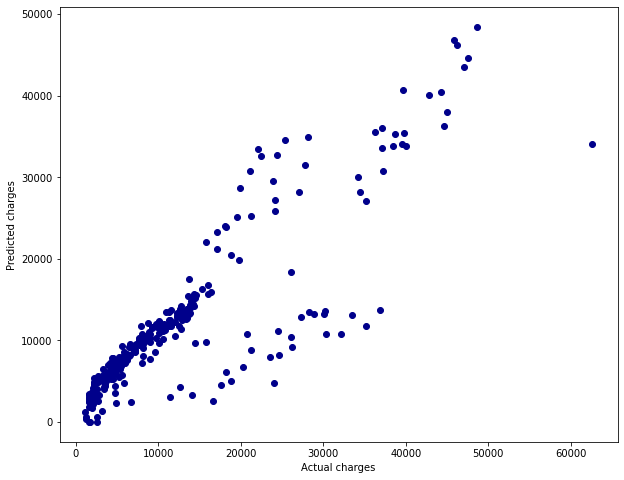

R2: 0.7417996429987244


In [28]:
# Adding early stopping to model training


model = build_model()
model.summary()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

EPOCHS = 500
hist = model.fit(x_train, y_train, epochs=EPOCHS, validation_split=0.2, verbose=False,
                 callbacks=[
                            tfdocs.modeling.EpochDots(), # Epochs are visualized as dots. Succint and visually appealing.
                            early_stop
                            ]
                 )

plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plt.figure(figsize=(10, 8))
plotter.plot({'Basic': hist}, metric='mae')
plt.ylabel('MAE [Charges]')
plt.show();

plt.figure(figsize=(10, 8))
plotter.plot({'Basic': hist}, metric='mse')
plt.ylabel('MAE [Charges^2]')
plt.show();

y_pred = model.predict(x_test).flatten()

plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, c='darkblue')
plt.xlabel('Actual charges')
plt.ylabel('Predicted charges')
plt.show();

print(f'R2: {r2_score(y_test, y_pred)}')

In [29]:
model.save_weights('./my_models/elu_64_weights')

In [30]:
!ls my_models/

checkpoint  elu_64_weights.data-00000-of-00001	elu_64_weights.index


In [32]:
model.save_weights('./my_models/elu_64_weights.h5', save_format='h5') # Lightweight alternative
!ls my_models/

checkpoint			    elu_64_weights.h5
elu_64_weights.data-00000-of-00001  elu_64_weights.index


In [34]:
# Saving architecture
elu_64_json = model.to_json()
pprint.pprint(json.loads(elu_64_json))
with open('./my_models/elu_64_config.json', 'w') as outfile:
  outfile.write(elu_64_json)

{'backend': 'tensorflow',
 'class_name': 'Sequential',
 'config': {'layers': [{'class_name': 'InputLayer',
                        'config': {'batch_input_shape': [None, 9],
                                   'dtype': 'float32',
                                   'name': 'dense_12_input',
                                   'ragged': False,
                                   'sparse': False}},
                       {'class_name': 'Dense',
                        'config': {'activation': 'elu',
                                   'activity_regularizer': None,
                                   'batch_input_shape': [None, 9],
                                   'bias_constraint': None,
                                   'bias_initializer': {'class_name': 'Zeros',
                                                        'config': {}},
                                   'bias_regularizer': None,
                                   'dtype': 'float32',
                                   'kernel_

In [35]:
!cat my_models/elu_64_config.json

{"class_name": "Sequential", "config": {"name": "sequential_4", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 9], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_12_input"}}, {"class_name": "Dense", "config": {"name": "dense_12", "trainable": true, "batch_input_shape": [null, 9], "dtype": "float32", "units": 32, "activation": "elu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dropout", "config": {"name": "dropout_3", "trainable": true, "dtype": "float32", "rate": 0.2, "noise_shape": null, "seed": null}}, {"class_name": "Dense", "config": {"name": "dense_13", "trainable": true, "dtype": "float32", "units": 64, "activation": "elu", "use_bias": true, "kernel_initializer": 

In [37]:
# Save both weights and architecture
model.save('./my_models/elu_64_config_weights')
!ls my_models/elu_64_config_weights/

INFO:tensorflow:Assets written to: ./my_models/elu_64_config_weights/assets
assets	keras_metadata.pb  saved_model.pb  variables


In [43]:
# Load config json
with open('./my_models/elu_64_config.json', 'r') as infile:
  model_json = json.load(infile)

In [44]:
model = keras.models.model_from_json(json.dumps(model_json))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                320       
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_13 (Dense)            (None, 64)                2112      
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________


In [45]:
# Load weights
print(f'Before Loading weights: {r2_score(y_test, model.predict(x_test))}')
model.load_weights('./my_models/elu_64_weights')
print(f'After Loading weights: {r2_score(y_test, model.predict(x_test))}')

Before Loading weights: -1.2640366060566168
After Loading weights: 0.7417996429987244


In [46]:
# Load both model config and weights
loaded_model = keras.models.load_model('./my_models/elu_64_config_weights/')
loaded_model.summary()
print(f'After Loading weights: {r2_score(y_test, loaded_model.predict(x_test))}')

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                320       
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_13 (Dense)            (None, 64)                2112      
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________
After Loading weights: 0.7417996429987244
